In [50]:
# Importing the Necessary Libraries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Importing the Dataset

vehicleclass =pd.read_csv('/home/vignesh/Documents/Jupyter/EV Project Hackathon/data/Vehicle Class - All.csv')
evsales=pd.read_csv('/home/vignesh/Documents/Jupyter/EV Project Hackathon/data/ev_sales_by_makers_and_cat_15-24.csv')
ev_market_place=pd.read_csv('/home/vignesh/Documents/Jupyter/EV Project Hackathon/data/EV Maker by Place.csv')
operationIpc=pd.read_csv('/home/vignesh/Documents/Jupyter/EV Project Hackathon/data/OperationalPC.csv')
evcat= pd.read_csv('/home/vignesh/Documents/Jupyter/EV Project Hackathon/data/ev_cat_01-24.csv')

##### Check Vehicle Class for missing values

In [30]:
print(vehicleclass)

# vehicleclass.isnull().sum()

vehicleclass.info()

                      Vehicle Class Total Registration
0   FOUR WHEELER (INVALID CARRIAGE)             21,346
1               HEAVY GOODS VEHICLE          58,70,865
2               HEAVY MOTOR VEHICLE           1,02,965
3           HEAVY PASSENGER VEHICLE           8,28,189
4               LIGHT GOODS VEHICLE        1,02,49,591
5               LIGHT MOTOR VEHICLE        6,50,61,773
6           LIGHT PASSENGER VEHICLE          43,43,410
7              MEDIUM GOODS VEHICLE           8,75,789
8              MEDIUM MOTOR VEHICLE           1,94,600
9          MEDIUM PASSENGER VEHICLE           3,25,015
10       OTHER THAN MENTIONED ABOVE          11,26,398
11                THREE WHEELER(NT)           6,79,804
12                 THREE WHEELER(T)        1,07,08,473
13   TWO WHEELER (INVALID CARRIAGE)           1,10,788
14                  TWO WHEELER(NT)       27,49,71,646
15                   TWO WHEELER(T)           1,29,181
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 t

##### Checking EV Sales dataset for Missing values

In [14]:
evsales

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,"""VOLVO GROUP INDIA PVT LTD""",0,0,31,12,0,0,0,0,0,0
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578
...,...,...,...,...,...,...,...,...,...,...,...,...
1381,2W,ZHEJIANG LUYUAN (IMPORTER: DYNAM EV TECH),0,0,0,0,0,0,0,21,45,9
1382,2W,ZHEJIANG TIANYING (IMPORTER: NEWTRON ELECTRIC),0,0,0,0,0,0,0,0,64,6
1383,2W,ZHONGHUALONG (IMPORTER: POWORO PVT LTD),0,0,0,0,0,0,0,0,0,54
1384,2W,ZHONGXING (IMPORTER:GREENO AUTOMOBILE),0,0,0,0,0,0,0,0,0,5


In [18]:
print(evsales.isnull().sum())

evsales.info()

Cat      0
Maker    0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
2021     0
2022     0
2023     0
2024     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Cat     1386 non-null   object
 1   Maker   1386 non-null   object
 2   2015    1386 non-null   int64 
 3   2016    1386 non-null   int64 
 4   2017    1386 non-null   int64 
 5   2018    1386 non-null   int64 
 6   2019    1386 non-null   int64 
 7   2020    1386 non-null   int64 
 8   2021    1386 non-null   int64 
 9   2022    1386 non-null   int64 
 10  2023    1386 non-null   int64 
 11  2024    1386 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 130.1+ KB


In [47]:
len(evsales['Maker'].unique())

1196

##### Checking EV Category dataset for Missing values

In [19]:
evcat

,Date,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,01/01/01,0,1,0,0,9,15,1,0,0,0,2,0,0,2,62,0
2,01/01/02,0,2,1,0,266,11,5,0,0,0,0,0,0,2,11,0
3,01/01/03,0,1,2,0,35,15,1,0,0,0,1,0,0,9,18,0
4,01/01/04,0,2,0,1,14,17,1,0,0,1,2,0,0,1,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,01/12/19,0,0,0,41,18,57,49,0,10,0,197,15,1,14412,1900,333
280,01/12/20,0,0,0,10,1,505,18,0,0,0,124,17,1,10230,4564,384
281,01/12/21,2,0,1,218,16,2483,133,0,2,0,124,17,0,24115,26150,494
282,01/12/22,0,0,0,146,30,2925,915,0,15,0,673,35,0,35604,64525,138


In [22]:
print(evcat.isnull().sum())

print(evcat.info())

Date                               0
FOUR WHEELER (INVALID CARRIAGE)    0
HEAVY GOODS VEHICLE                0
HEAVY MOTOR VEHICLE                0
HEAVY PASSENGER VEHICLE            0
LIGHT GOODS VEHICLE                0
LIGHT MOTOR VEHICLE                0
LIGHT PASSENGER VEHICLE            0
MEDIUM GOODS VEHICLE               0
MEDIUM PASSENGER VEHICLE           0
MEDIUM MOTOR VEHICLE               0
OTHER THAN MENTIONED ABOVE         0
THREE WHEELER(NT)                  0
TWO WHEELER (INVALID CARRIAGE)     0
THREE WHEELER(T)                   0
TWO WHEELER(NT)                    0
TWO WHEELER(T)                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Date                             284 non-null    object
 1   FOUR WHEELER (INVALID CARRIAGE)  284 non-null    int64 
 2   HEAV

##### Visualization

**There are no missng values in the Dataset**

/tmp/ipykernel_58559/2470714648.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vehicleclass, y='Vehicle Class', x='Total Registration', palette='viridis')


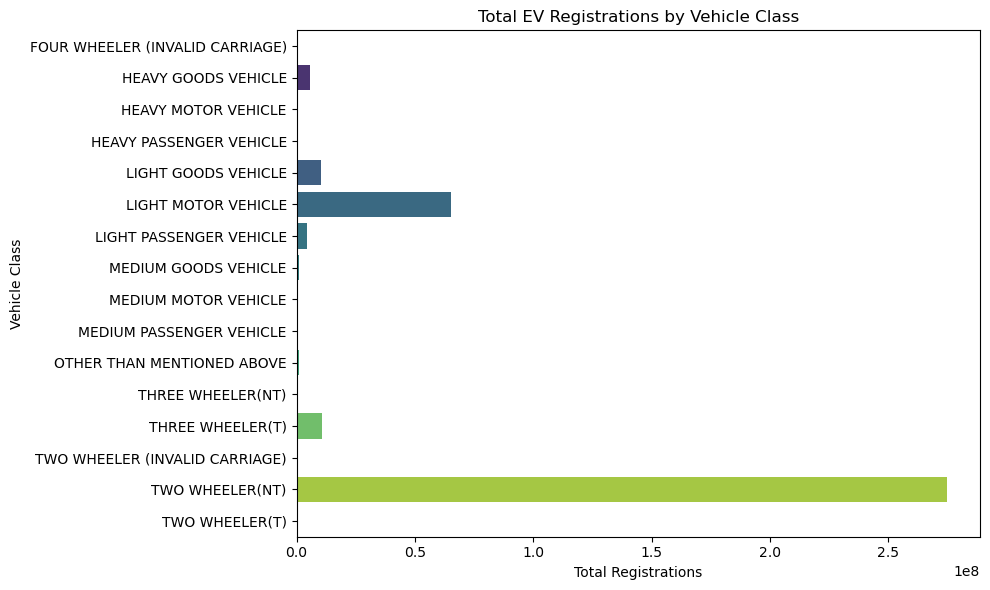

In [ ]:
# Vehicle Class 
# Toal Registrations

vehicleclass['Total Registration'] = vehicleclass['Total Registration'].str.replace(',', '').astype(int)

plt.figure(figsize=(10, 6))
sns.barplot(data=vehicleclass, y='Vehicle Class', x='Total Registration', palette='viridis')
plt.title('Total EV Registrations by Vehicle Class')
plt.xlabel('Total Registrations')
plt.ylabel('Vehicle Class')
plt.tight_layout()
plt.show()

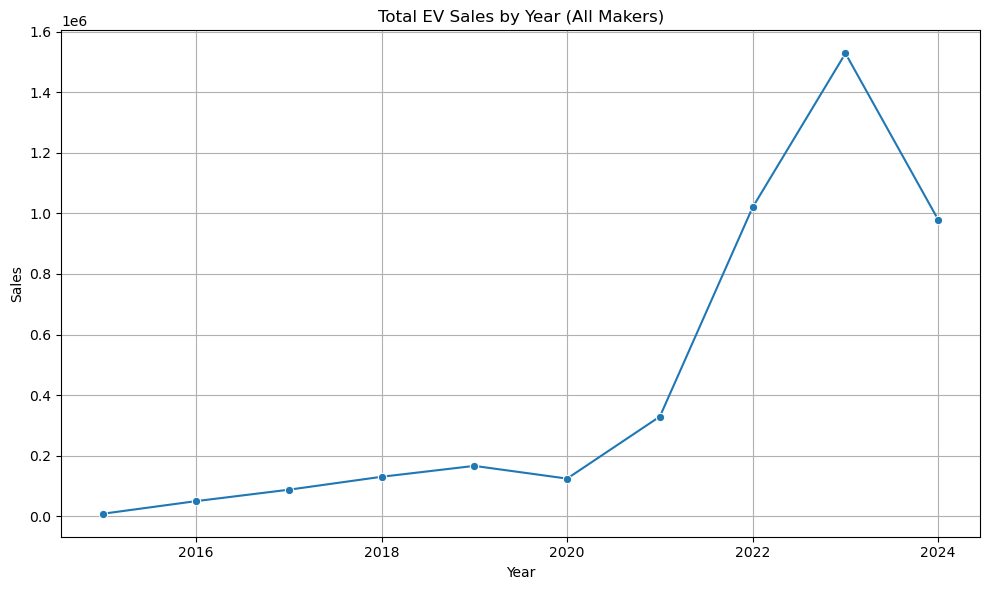

In [38]:
# EV Sales Over the Years (All Makers)

evsales['Maker'] = evsales['Maker'].str.replace('"', '')
evsales_long = evsales.melt(id_vars=['Cat', 'Maker'], var_name='Year', value_name='Sales')
evsales_long['Year'] = evsales_long['Year'].astype(int)

yearly_sales = evsales_long.groupby('Year')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sales, x='Year', y='Sales', marker='o')
plt.title('Total EV Sales by Year (All Makers)')
plt.ylabel('Sales')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_58559/2465166321.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_makers, y='Maker', x='Total Sales', palette='coolwarm')


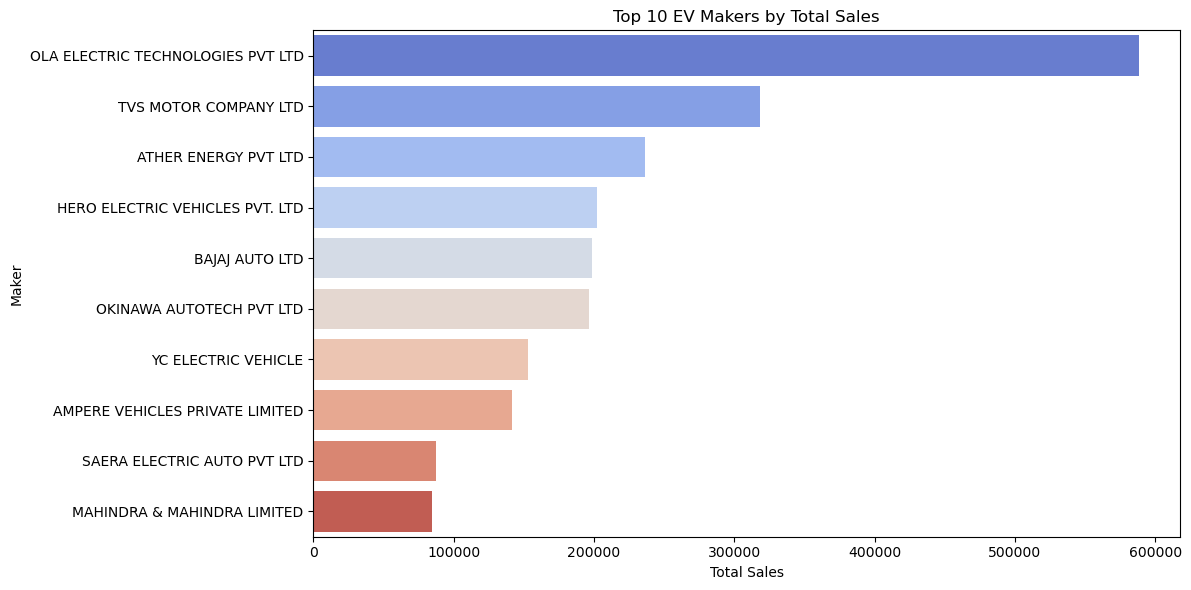

In [49]:
# Top 10 EV Makers by Total Sales

evsales['Total Sales'] = evsales.loc[:, '2015':'2024'].sum(axis=1)
top_makers = evsales.groupby('Maker')['Total Sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_makers, y='Maker', x='Total Sales', palette='coolwarm')
plt.title('Top 10 EV Makers by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Maker')
plt.tight_layout()
plt.show()


/tmp/ipykernel_58559/1782676043.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_counts, x='State', y='Number of Makers', palette='Set2')


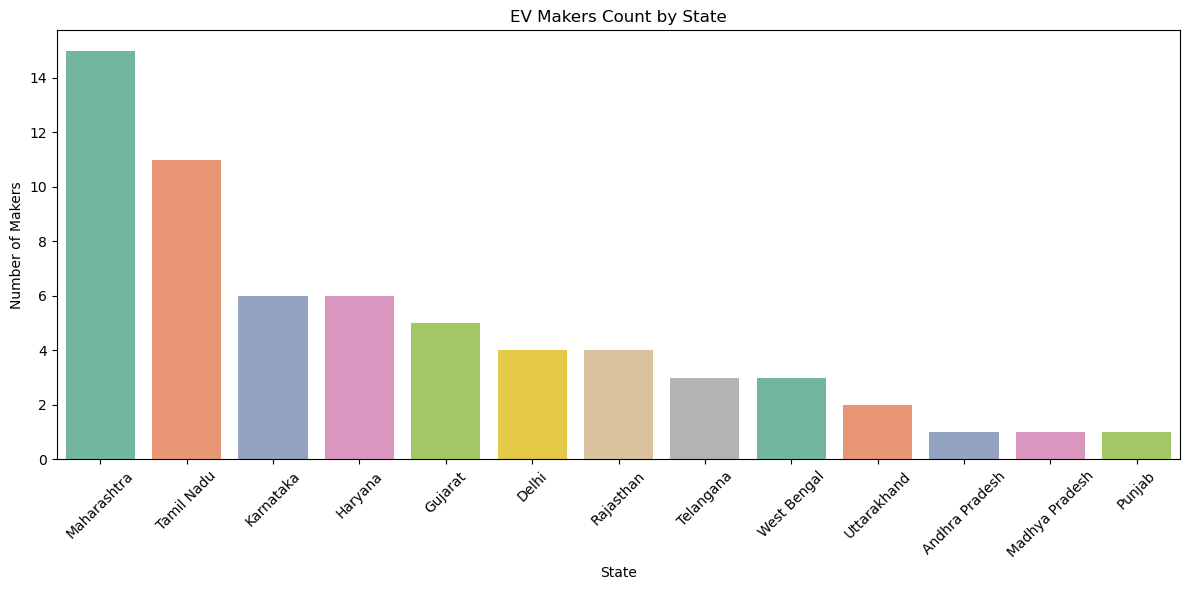

In [41]:
#  EV Makers Distribution by State

state_counts = ev_market_place['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Number of Makers']

plt.figure(figsize=(12, 6))
sns.barplot(data=state_counts, x='State', y='Number of Makers', palette='Set2')
plt.title('EV Makers Count by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_58559/3136700354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=operationIpc.sort_values(by='No. of Operational PCS', ascending=False),


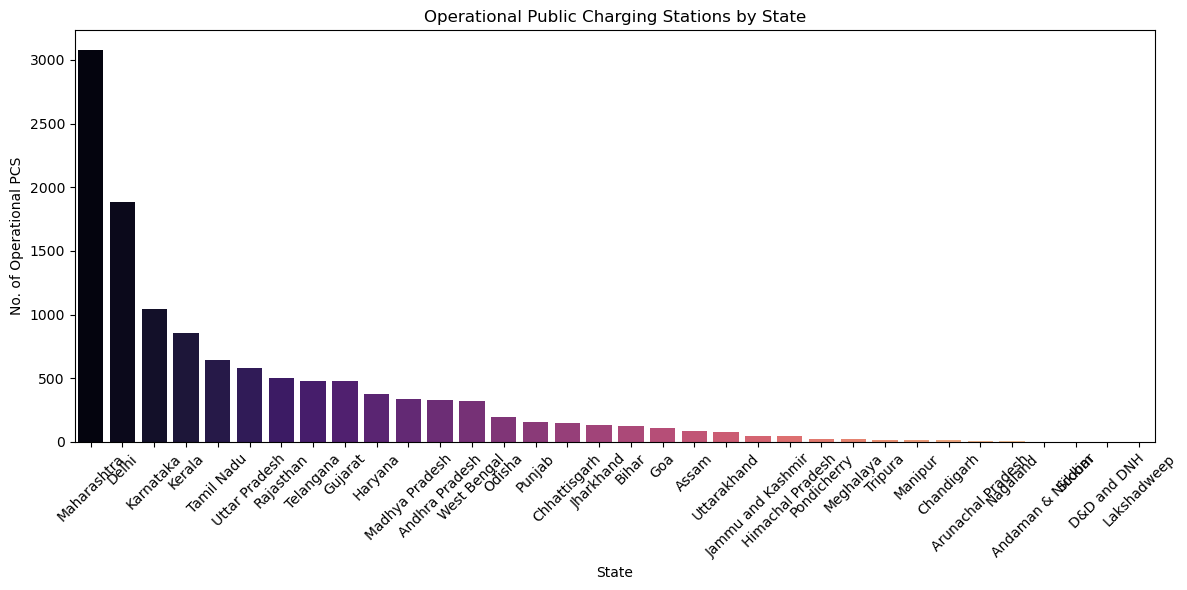

In [42]:
# Operational Public Charging Stations per State

plt.figure(figsize=(12, 6))
sns.barplot(data=operationIpc.sort_values(by='No. of Operational PCS', ascending=False),
            x='State', y='No. of Operational PCS', palette='magma')
plt.title('Operational Public Charging Stations by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_58559/3812484767.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  evcat['Date'] = pd.to_datetime(evcat['Date'], errors='coerce')


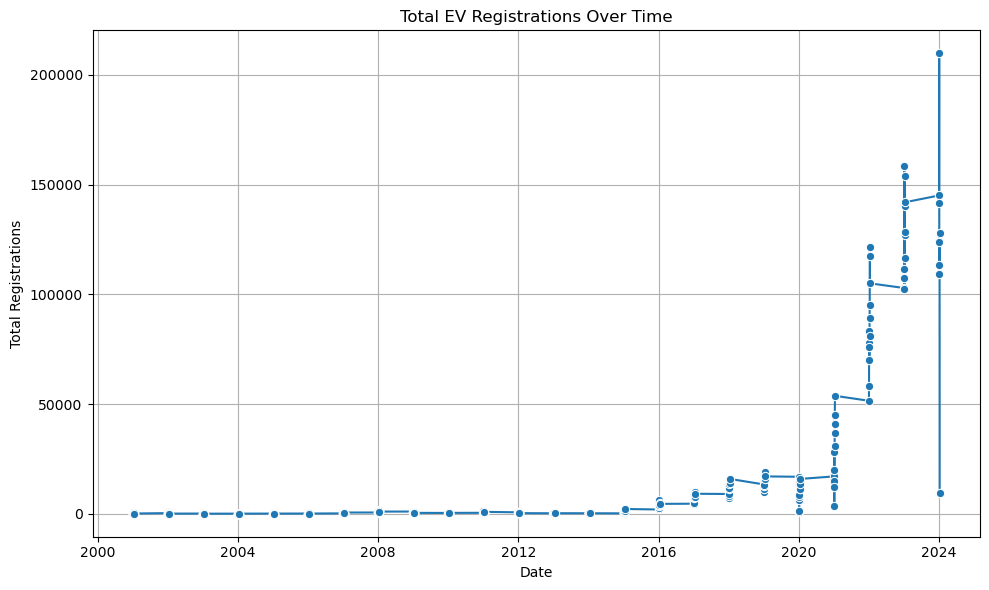

In [43]:
# Total EV Registrations Over Time (All Categories)

evcat['Date'] = pd.to_datetime(evcat['Date'], errors='coerce')

# Convert all columns except Date to numeric
evcat.iloc[:, 1:] = evcat.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

evcat['Total'] = evcat.iloc[:, 1:].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.lineplot(data=evcat, x='Date', y='Total', marker='o')
plt.title('Total EV Registrations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Registrations')
plt.grid(True)
plt.tight_layout()
plt.show()


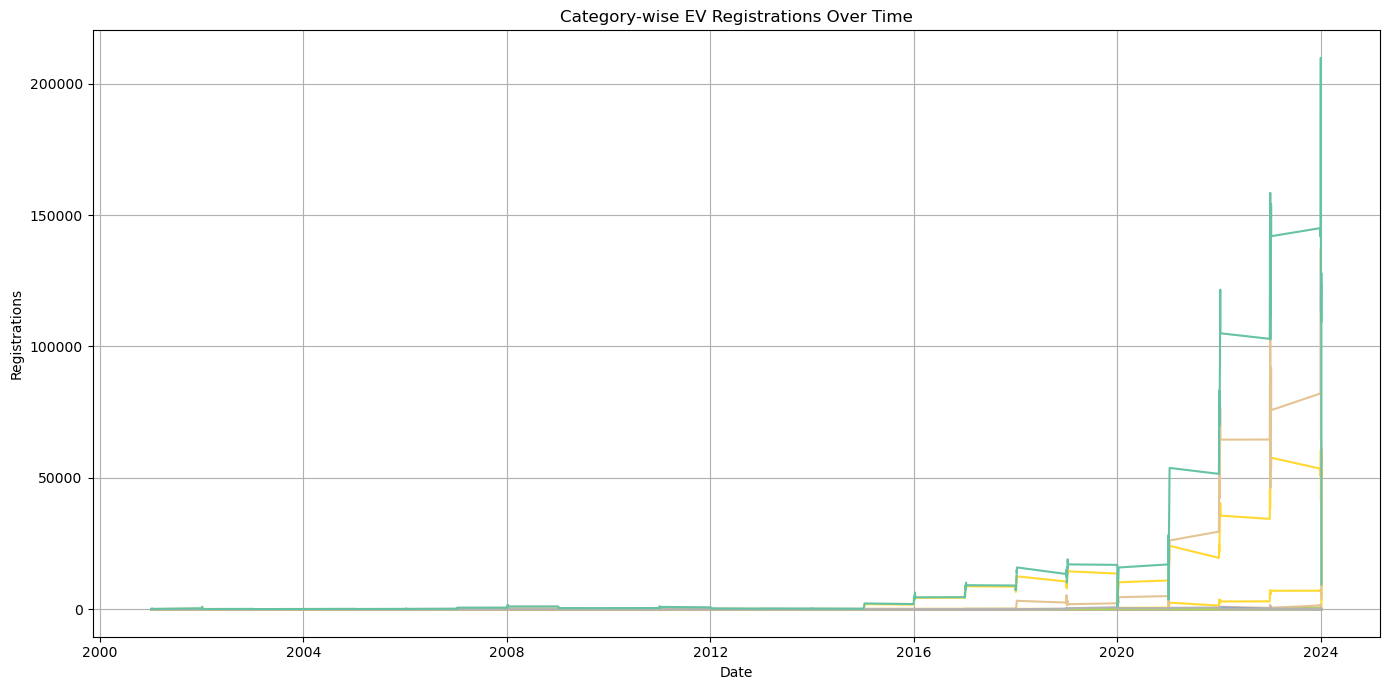

In [59]:
# Category-wise EV Trends Over Time

evcat_melt = evcat.melt(id_vars='Date', var_name='Vehicle Type', value_name='Registrations')

plt.figure(figsize=(14, 7))
sns.lineplot(data=evcat_melt, x='Date', y='Registrations', hue='Vehicle Type', legend=False, palette='Set2')
plt.title('Category-wise EV Registrations Over Time')
plt.xlabel('Date')
plt.ylabel('Registrations')
plt.grid(True)
plt.tight_layout()
plt.show()